# Telco churn 💕

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

pd.set_option('display.max_columns', 100)

**Import Dataset**

In [170]:
tlc_db = pd.read_csv("TelcoChurn.csv")
tlc_db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Our Dataset initially has 7043 observations and 21 predictors**

In [171]:
tlc_db.shape

(7043, 21)

**Looking at the types we notice that therea are many strings (Yes/No,..) readed as objects**

In [172]:
tlc_db.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data analysis and cleaning

#### Once we've found all available info areas that we want to use, we proceed to the table exploration. 
#### The goal is familiarise with data find errors / dirt request clarifications to the customer 
#### Let's start with the base table, containing the analysis scope with customer info. 
#### We use describe method to have a global vision of data statistics.

In [173]:
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,5035-PGZXH,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**'Total Charges', as we've seen, is an object so we want to convert it to a float element. But first we have to replace spaces with 'nan'.**

In [174]:
tlc_db['TotalCharges'] = tlc_db["TotalCharges"].replace(" ",np.nan)

# Seeking for Na values
#### As we could expect thare are some Na values in TotalCharges column..we introduced them! 
#### Anyway, is better having Nas than blank spaces..it's easier to deal with them.

In [175]:
tlc_db.columns[tlc_db.isna().any()].tolist()

['TotalCharges']

**We first drop NA from the TotalCharges column, than, due to the fact that we've to deal with sklearn and pandas packages, we reset the index, otherwise we could get some problems.. (we tried, and we had!)**

In [176]:
tlc_db['TotalCharges'] = tlc_db["TotalCharges"].replace(np.nan,0)

In [177]:
tlc_db["TotalCharges"] = tlc_db["TotalCharges"].astype(float)

**Check**

In [178]:
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,5035-PGZXH,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


## Now our Dataset is clean, there are no missing values 🎻

## Analyzing columns

In [179]:
tlc_db['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

**It's useful to deal with binary categorical variable by transforming to binary numerical (0/1) variable.
** We're going to do it with ''Partner','Dependents','PhoneService','PaperlessBilling','Churn'.**

## Transforming "yes/no" into "0/1"

In [180]:
tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']] = tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].replace({'No': 0, 'Yes': 1})
tlc_db['gender'] = tlc_db['gender'].replace({'Male': 0, 'Female': 1})
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,5035-PGZXH,NaN,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,No,No,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,3390,3096,3498,3088,3095,3473,2810,2785,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2279.734304,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.090047,2266.794470,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,398.550000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,1.000000


**With categorical variable that have more than 2 catgories have to be trasformed using the so called 'One hot encoding' techinque**

In [181]:
tlc_db1 = tlc_db.copy()
tlc_db1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**Our 'One hot encoding' code**

In [182]:
tlc_db1 = tlc_db.copy()

columns1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for colnames in columns1:
    mlt = pd.get_dummies(tlc_db1[colnames])
    list1 = list(mlt.columns.values)
    listaname = []
    for i in list1:
        string = "" 
        for y in i.split():
            string += y.capitalize()
        listaname.append(colnames+'_'+string)

    mlt.set_axis(listaname, axis='columns', inplace=True)
    tlc_db1.drop(colnames, axis = 1, inplace=True)
    tlc_db1 = pd.concat([tlc_db1, mlt], axis = 1)

**We do not need to leave the column 'customerID' as a predictor, because it is obviously not relevant.**

In [183]:
tlc_db1.drop('customerID',1,inplace=True)
tlc_db1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,99.65,820.50,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,89.10,1949.40,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,29.75,301.90,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,104.80,3046.05,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,56.15,3487.95,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0


In [184]:
tlc_db1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

In [185]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

lab = tlc_db["Churn"].value_counts().keys().tolist()
#values
val = tlc_db["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'orangered' ,'darkviolet'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 180,
               hoverinfo = "label+value+text",
               hole = .4
              )
layout = go.Layout(dict(title = "Churn Rate",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

**Do tenure influence the churn rate? Let's try to understand it by analyzing the churn rate for every tenure level.**

In [186]:
pd.DataFrame(tlc_db1.groupby('tenure').agg({'Churn': ['count', 'sum', 'mean']}))

Churn               
       count  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
5        133   64  0.481203
6        110   40  0.363636
7        131   51  0.389313
8        123   42  0.341463
9        119   46  0.386555
10       116   45  0.387931
11        99   31  0.313131
12       117   38  0.324786
13       109   38  0.348624
14        76   24  0.315789
15        99   37  0.373737
16        80   28  0.350000
17        87   26  0.298851
18        97   24  0.247423
19        73   19  0.260274
20        71   18  0.253521
21        63   17  0.269841
22        90   27  0.300000
23        85   13  0.152941
24        94   23  0.244681
25        79   23  0.291139
26        79   15  0.189873
27        72   13  0.180556
28        57   12  0.210526
29        72   15  0.208333
...      ...  ...       ...
43        65   15  0.230769
44        51    6  0.117647
45        61    6  0.098361
46        74   12  0.162162
47        68   14  0.205882
48        64    9  0.140625
49        66   15  0.227273
50        68   10  0.147059
51        68    8  0.117647
52        80    8  0.100000
53        70   14  0.200000
54        68   13  0.191176
55        64    9  0.140625
56        80   10  0.125000
57        65    8  0.123077
58        67   11  0.164179
59        60    8  0.133333
60        76    6  0.078947
61        76    8  0.105263
62        70    5  0.071429
63        72    4  0.055556
64        80    4  0.050000
65        76    9  0.118421
66        89   13  0.146067
67        98   10  0.102041
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]

**How the churn rate is distribute along the different types of contract?**

In [187]:
pd.DataFrame(tlc_db.groupby('Contract').agg({'Churn': ['count', 'sum', 'mean']}))

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

**We do the same we the variable 'MonthlyCharges'**

In [188]:
pd.DataFrame(tlc_db1.groupby('MonthlyCharges').agg({'Churn': ['count', 'sum', 'mean']}))

Churn              
               count sum      mean
MonthlyCharges                    
18.25              1   0  0.000000
18.40              1   0  0.000000
18.55              1   0  0.000000
18.70              2   0  0.000000
18.75              1   0  0.000000
18.80              7   0  0.000000
18.85              5   1  0.200000
18.90              2   0  0.000000
18.95              6   1  0.166667
19.00              7   1  0.142857
19.05              9   0  0.000000
19.10             12   1  0.083333
19.15             11   0  0.000000
19.20             17   0  0.000000
19.25             18   3  0.166667
19.30             24   3  0.125000
19.35             25   2  0.080000
19.40             31   4  0.129032
19.45             28   3  0.107143
19.50             32   3  0.093750
19.55             40   2  0.050000
19.60             37   4  0.108108
19.65             43   4  0.093023
19.70             43   2  0.046512
19.75             39   6  0.153846
19.80             38   3  0.078947
19.85             45   5  0.111111
19.90             44   4  0.090909
19.95             44   3  0.068182
20.00             43   3  0.069767
...              ...  ..       ...
115.80             4   0  0.000000
115.85             1   0  0.000000
116.00             1   0  0.000000
116.05             3   0  0.000000
116.10             2   0  0.000000
116.15             1   0  0.000000
116.20             1   1  1.000000
116.25             3   0  0.000000
116.30             1   0  0.000000
116.40             1   0  0.000000
116.45             1   0  0.000000
116.50             1   0  0.000000
116.55             1   0  0.000000
116.60             2   0  0.000000
116.75             1   0  0.000000
116.80             1   0  0.000000
116.85             1   0  0.000000
116.95             1   0  0.000000
117.15             1   0  0.000000
117.20             1   0  0.000000
117.35             1   0  0.000000
117.45             1   1  1.000000
117.50             1   0  0.000000
117.60             1   0  0.000000
117.80             1   1  1.000000
118.20             1   0  0.000000
118.35             1   1  1.000000
118.60             2   0  0.000000
118.65             1   0  0.000000
118.75             1   0  0.000000

[1585 rows x 3 columns]

**Due to clear problem of visualization and interpretation we prefer to divide the distribution into n equally spaced groups**

In [189]:
ct = pd.crosstab(pd.cut(tlc_db1.loc[tlc_db1['MonthlyCharges'].between(18,120), 'MonthlyCharges'], bins=10), tlc_db1['Churn'])
ct.columns = ['0', '1']
display(ct)
ct['tot'] = ct['0'] + ct['1']
ct.div(ct['tot'], 0)

,0,1
MonthlyCharges,,
"(18.15, 28.3]",1458,148
"(28.3, 38.35]",134,57
"(38.35, 48.4]",246,119
"(48.4, 58.45]",488,152
"(58.45, 68.5]",420,54
"(68.5, 78.55]",544,349
"(78.55, 88.6]",598,355
"(88.6, 98.65]",553,320
"(98.65, 108.7]",482,272


,0,1,tot
MonthlyCharges,,,
"(18.15, 28.3]",0.907846,0.092154,1.0
"(28.3, 38.35]",0.701571,0.298429,1.0
"(38.35, 48.4]",0.673973,0.326027,1.0
"(48.4, 58.45]",0.762500,0.237500,1.0
"(58.45, 68.5]",0.886076,0.113924,1.0
"(68.5, 78.55]",0.609183,0.390817,1.0
"(78.55, 88.6]",0.627492,0.372508,1.0
"(88.6, 98.65]",0.633448,0.366552,1.0
"(98.65, 108.7]",0.639257,0.360743,1.0


**Then we prefer to analyze only lower monthly charges from 18 to 25, because they are those with the highest number.**

In [190]:
ct = pd.crosstab(pd.cut(tlc_db1.loc[tlc_db1['MonthlyCharges'].between(18,25), 'MonthlyCharges'], bins=10), tlc_db1['Churn'])
ct.columns = ['0', '1']
display(ct)
ct['tot'] = ct['0'] + ct['1']
ct.div(ct['tot'], 0)

,0,1
MonthlyCharges,,
"(18.243, 18.925]",19,1
"(18.925, 19.6]",270,27
"(19.6, 20.275]",498,53
"(20.275, 20.95]",271,20
"(20.95, 21.625]",23,2
"(22.3, 22.975]",1,0
"(22.975, 23.65]",9,2
"(23.65, 24.325]",55,6
"(24.325, 25.0]",133,16


,0,1,tot
MonthlyCharges,,,
"(18.243, 18.925]",0.950000,0.050000,1.0
"(18.925, 19.6]",0.909091,0.090909,1.0
"(19.6, 20.275]",0.903811,0.096189,1.0
"(20.275, 20.95]",0.931271,0.068729,1.0
"(20.95, 21.625]",0.920000,0.080000,1.0
"(22.3, 22.975]",1.000000,0.000000,1.0
"(22.975, 23.65]",0.818182,0.181818,1.0
"(23.65, 24.325]",0.901639,0.098361,1.0
"(24.325, 25.0]",0.892617,0.107383,1.0


In [214]:
tlc_db1.to_csv("Tlc.csv")

## In order to develop our model we need to split our data set into a training set and a test set to evalute the model itself.

### Train/Test Split
#### We use an ad hoc function to do it. It allows us to have the same churn rate in the two different dataset.

In [191]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [192]:
sss = StratifiedShuffleSplit(test_size=0.25, n_splits=1, random_state=1234)

for train_index, test_index in sss.split(tlc_db1, tlc_db1['Churn']):
    print(len(train_index), len(test_index))
    print(tlc_db1.loc[train_index, 'Churn'].mean(), tlc_db1.loc[test_index, 'Churn'].mean())
    train = tlc_db1.loc[train_index]
    test = tlc_db1.loc[test_index]

5282 1761
0.2654297614539947 0.26519023282226006


In [215]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [193]:
train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.493942,0.157137,0.485233,0.297993,32.294207,0.904392,0.588603,64.706087,2267.275738,0.265430,0.479175,0.095608,0.425218,0.345134,0.437334,0.217531,0.492995,0.217531,0.289474,0.439796,0.217531,0.342673,0.440174,0.217531,0.342295,0.495078,0.217531,0.287391,0.398334,0.217531,0.384135,0.393790,0.217531,0.388679,0.549792,0.209580,0.240629,0.218667,0.210905,0.342295,0.228133
std,0.500011,0.363965,0.499829,0.457420,24.517927,0.294080,0.492134,30.035496,2256.316414,0.441604,0.499613,0.294080,0.494423,0.475457,0.496104,0.412606,0.499998,0.412606,0.453561,0.496409,0.412606,0.474648,0.496455,0.412606,0.474523,0.500023,0.412606,0.452588,0.489601,0.412606,0.486436,0.488636,0.412606,0.487496,0.497562,0.407047,0.427506,0.413381,0.407990,0.474523,0.419669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.462500,399.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.725000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.800000,3756.437500,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Matrix
### Useful to do feature selection in order to drop predictors correlated with each others.

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

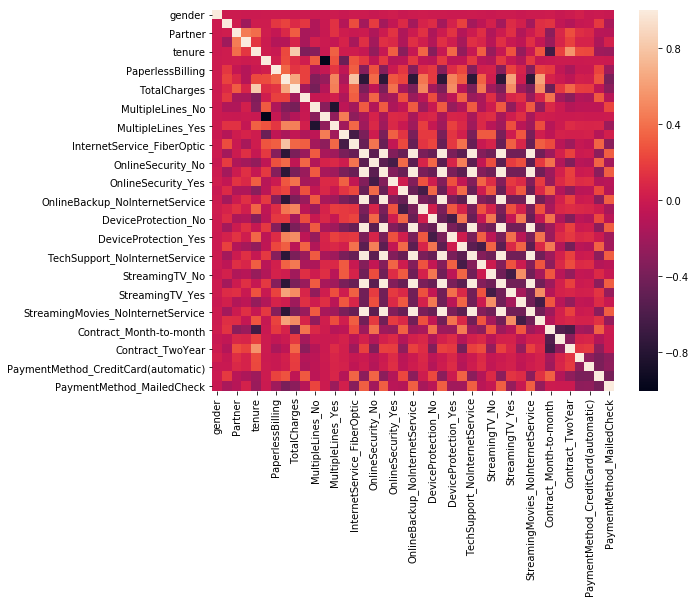

In [195]:
correlations = train.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlations)
plt.show()

We create our two final dataset of train and test.

In [196]:
X = train.drop('Churn', 1)
y = train['Churn']
X_test = test.drop('Churn', 1)
y_test = test['Churn']

## Feature Selection

In [197]:
couples = {}
drop_c = []
for i, r in correlations.iterrows():
    for j, x in r.iteritems():
        if i != j and np.abs(x) > 0.9 and i not in drop_c and j not in drop_c:
            couples[(i, j)] = (correlations.loc[i, j], correlations.loc[i, 'Churn'], correlations.loc[j, 'Churn'])
            drop_c.append(j)

display(pd.DataFrame(couples).T)

0         1         2
PhoneService       MultipleLines_NoPhoneService       -1.0  0.019016 -0.019016
InternetService_No OnlineSecurity_NoInternetService    1.0 -0.231728 -0.231728
                   OnlineBackup_NoInternetService      1.0 -0.231728 -0.231728
                   DeviceProtection_NoInternetService  1.0 -0.231728 -0.231728
                   TechSupport_NoInternetService       1.0 -0.231728 -0.231728
                   StreamingTV_NoInternetService       1.0 -0.231728 -0.231728
                   StreamingMovies_NoInternetService   1.0 -0.231728 -0.231728

# ML Models 

## Logistic Regression

In [198]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler

In [200]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7876206701


In [34]:
X_test.shape

(1758, 40)

### Pipeline

In [202]:
from sklearn.pipeline import Pipeline

In [203]:
lr_model = Pipeline([('scaler', RobustScaler()), ('model', LogisticRegression())])

In [204]:
tlc_db.columns[tlc_db.isna().any()].tolist()

[]

# 🎻

In [205]:
lr_model1 = lr_model.fit(X.drop(drop_c, 1), y)

lr_probs = [y for (x, y) in lr_model.predict_proba(X.drop(drop_c, 1))]
lr_probs_test = [y for (x, y) in lr_model.predict_proba(X_test.drop(drop_c, 1))]

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [206]:
y2_pred = lr_model1.predict(X_test.drop(drop_c, 1))
print('Accuracy of logistic regression classifier on test set:',accuracy_score(y_test,y2_pred))

Accuracy of logistic regression classifier on test set: 0.7876206700738216


In [207]:
print('\n'.join([str((x, c)) for (x, c) in zip(X.drop(drop_c, 1).columns, lr_model.named_steps['model'].coef_[0])]))

('gender', -0.015025951871780793)
('SeniorCitizen', 0.2877511657965188)
('Partner', -0.1118861653834198)
('Dependents', -0.11257234825836794)
('tenure', -2.523048457973051)
('PhoneService', -0.04175100017881046)
('PaperlessBilling', 0.3883908935042987)
('MonthlyCharges', -0.047193095613633385)
('TotalCharges', 0.9073761870514151)
('MultipleLines_No', -0.47132819617308774)
('MultipleLines_Yes', -0.2883361761279115)
('InternetService_Dsl', -0.40330728898987517)
('InternetService_FiberOptic', 0.4505613204643441)
('InternetService_No', -0.7651674035976803)
('OnlineSecurity_No', 0.2519322309085211)
('OnlineSecurity_Yes', -0.20467819943381874)
('OnlineBackup_No', 0.11760956039242845)
('OnlineBackup_Yes', -0.07035552891786342)
('DeviceProtection_No', 0.05402208825724887)
('DeviceProtection_Yes', -0.006768056783360052)
('TechSupport_No', 0.20768956652203732)
('TechSupport_Yes', -0.16043553504725372)
('StreamingTV_No', -0.1129672092508079)
('StreamingTV_Yes', 0.1602212407258222)
('StreamingMovi

## Roc Auc results

In [41]:
print(roc_auc_score(y, lr_probs))
print(roc_auc_score(y_test, lr_probs_test))

0.8557217183834191
0.8216569331079769


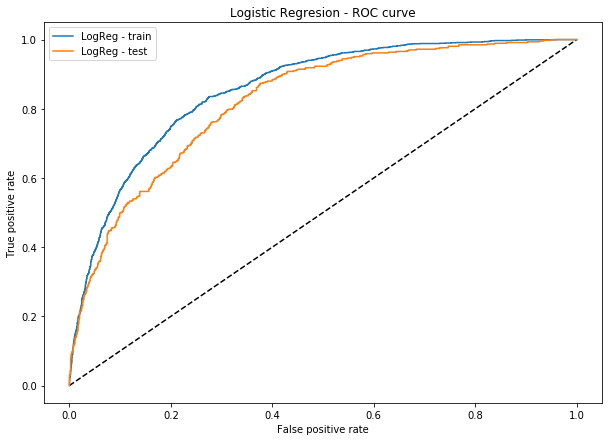

In [42]:
lr_fpr_train, lr_tpr_train, _ = roc_curve(y, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr_train, lr_tpr_train, label='LogReg - train')
plt.plot(lr_fpr, lr_tpr, label='LogReg - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regresion - ROC curve')
plt.legend(loc='best')
plt.show()

In [98]:
with open('./lr_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)

In [213]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.406073
         Iterations: 35
                                                                       Results: Logit
Model:                                              Logit                                          Pseudo R-squared:                               0.298    
Dependent Variable:                                 Churn                                          AIC:                                            4337.7546
Date:                                               2019-03-22 16:41                               BIC:                                            4495.4840
No. Observations:                                   5282                                           Log-Likelihood:                                 -2144.9  
Df Model:                                           23                                             LL-Null:                                        -3056.5  
Df Residuals:                                       5258       

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**criterion:** 'gini' or 'entropy', to measure the quality of a split<br>
**max_depth:** maximum depth of the tree; if not specified, it create the "maximum" tree<br>
**min_samples_split / min_samples_leaf:** minimum number (or fraction) of records to create a new split / leaf<br>
**random_state:** random seed to start from for the random choices, important for reproducibility

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier(random_state=1234)

#### Hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 11, 2), 'min_samples_leaf': [0.1, 0.01, 0.001]}
cv_tuning = RandomizedSearchCV(dt, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 5, 7, 9]), 'min_samples_leaf': [0.1, 0.01, 0.001]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [47]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.01, 'max_depth': 7, 'criterion': 'gini'}, 0.8720155853603304, 0.8355720935932972)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'entropy'}, 0.8604237853621186, 0.8329820317156015)
({'min_samples_leaf': 0.001, 'max_depth': 3, 'criterion': 'gini'}, 0.8294508512694737, 0.8179224839940643)
({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'gini'}, 0.8274685375497143, 0.8205806491930405)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'gini'}, 0.8294508512694737, 0.8179224839940643)
({'min_samples_leaf': 0.1, 'max_depth': 7, 'criterion': 'entropy'}, 0.8269922961288081, 0.8199768904771435)
({'min_samples_leaf': 0.001, 'max_depth': 5, 'criterion': 'gini'}, 0.8615485073741747, 0.8314614742227934)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'gini'}, 0.86075483477837, 0.8364552870577094)
({'min_samples_leaf': 0.1, 'max_depth': 3, 'criterion': 'gini'}, 0.8274685375497143, 0.8205806491930405)
({'min_samples_leaf': 0.001, 'max_depth': 7

In [48]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [5,6], 'min_samples_leaf': [0.1, 0.01]}
cv_tuning = RandomizedSearchCV(dt, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6], 'min_samples_leaf': [0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [49]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'gini'}, 0.8274685375497143, 0.8205806491930405)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'gini'}, 0.86075483477837, 0.8364552870577094)
({'min_samples_leaf': 0.1, 'max_depth': 6, 'criterion': 'gini'}, 0.8274685375497143, 0.8205806491930405)
({'min_samples_leaf': 0.01, 'max_depth': 6, 'criterion': 'gini'}, 0.8679539896685267, 0.8373683937391112)
({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'entropy'}, 0.8269922961288081, 0.8199768904771435)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'entropy'}, 0.8604237853621186, 0.8329820317156015)
({'min_samples_leaf': 0.1, 'max_depth': 6, 'criterion': 'entropy'}, 0.8269922961288081, 0.8199768904771435)
({'min_samples_leaf': 0.01, 'max_depth': 6, 'criterion': 'entropy'}, 0.8684118101891652, 0.8356541033865617)


The parameters that in our opinion are not so efficient are "Gini Criterion" and "0.1 min sample leaf"
The best hyperparameters are min_samples_leaf= 0.01, max_depth = 6, criterion = "entropy"

In [50]:
dectree = DecisionTreeClassifier(random_state=1234, criterion= "entropy", max_depth=6, min_samples_leaf= 0.01)
dectree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [51]:
dectree_probs = [y for (x, y) in dectree.predict_proba(X)]
dectree_probs_test = [y for (x, y) in dectree.predict_proba(X_test)]

print(roc_auc_score(y, dectree_probs))
print(roc_auc_score(y_test, dectree_probs_test))

0.8648970147428112
0.814130771922899


OVERRRRRRRRFIITTTTTT

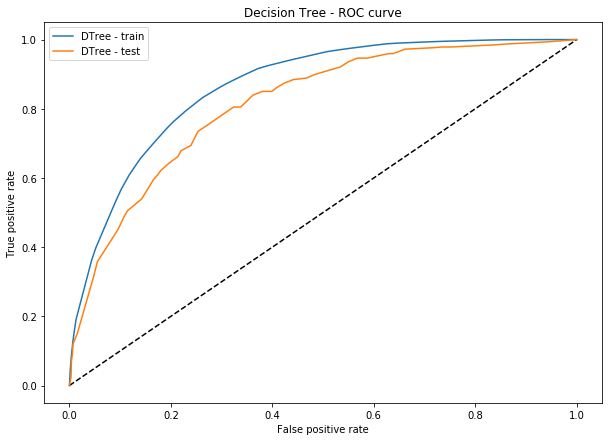

In [52]:
dt_fpr_train, dt_tpr_train, _ = roc_curve(y, dectree_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dectree_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(dt_fpr_train, dt_tpr_train, label='DTree - train')
plt.plot(dt_fpr, dt_tpr, label='DTree - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree - ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(features_num,3,"gini","best")

In [97]:
with open('./dectree.pkl', 'wb') as f:
    pkl.dump(dectree, f)

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1234, n_estimators=50)

In [54]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2, 6), 'min_samples_leaf': np.logspace(-1, -3, 3)}
cv_tuning = RandomizedSearchCV(rf, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, 4, 5]), 'min_samples_leaf': array([0.1  , 0.01 , 0.001])},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [55]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.01, 'max_depth': 4, 'criterion': 'gini'}, 0.854924382817406, 0.8469778244630788)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'entropy'}, 0.8477065669886901, 0.8417573450237354)
({'min_samples_leaf': 0.001, 'max_depth': 2, 'criterion': 'gini'}, 0.8409354504932036, 0.8376207353223811)
({'min_samples_leaf': 0.1, 'max_depth': 3, 'criterion': 'gini'}, 0.8409788560081328, 0.8380777641229101)
({'min_samples_leaf': 0.01, 'max_depth': 2, 'criterion': 'gini'}, 0.8408512743883574, 0.8374640379996289)
({'min_samples_leaf': 0.1, 'max_depth': 4, 'criterion': 'entropy'}, 0.8386424923053546, 0.8345736002280504)
({'min_samples_leaf': 0.001, 'max_depth': 3, 'criterion': 'gini'}, 0.8490093014093315, 0.8442005393243116)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'gini'}, 0.8486533118042179, 0.8437335354706467)
({'min_samples_leaf': 0.1, 'max_depth': 2, 'criterion': 'gini'}, 0.8402464479799285, 0.8373863110380092)
({'min_samples_leaf': 0.001, 'max_depth': 

In [56]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini')

params = {'max_depth': [3,4], 'min_samples_leaf': [0.01, 0.001], 'max_features': ['sqrt', 0.2, 0.5]}
cv_tuning = RandomizedSearchCV(rf, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [3, 4], 'min_samples_leaf': [0.01, 0.001], 'max_features': ['sqrt', 0.2, 0.5]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [57]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 4}, 0.8560818217472251, 0.8468333206916264)
({'min_samples_leaf': 0.01, 'max_features': 0.2, 'max_depth': 4}, 0.8561940233916576, 0.8491346754764969)
({'min_samples_leaf': 0.001, 'max_features': 0.5, 'max_depth': 4}, 0.861152179003079, 0.8479020974185046)
({'min_samples_leaf': 0.01, 'max_features': 0.2, 'max_depth': 3}, 0.8512121981429817, 0.8460136147930823)
({'min_samples_leaf': 0.001, 'max_features': 0.2, 'max_depth': 4}, 0.8576813147764477, 0.8487439024091145)
({'min_samples_leaf': 0.01, 'max_features': 0.5, 'max_depth': 4}, 0.8598426809446881, 0.8483213317359425)
({'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 3}, 0.8490093014093315, 0.8442005393243116)
({'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 3}, 0.8486533118042179, 0.8437335354706467)
({'min_samples_leaf': 0.01, 'max_features': 0.5, 'max_depth': 3}, 0.8502786914716394, 0.8442866803028094)
({'min_samples_leaf': 0.001, 'max_

In [58]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini', max_depth=3)

params = {'min_samples_leaf': [0.01, 0.001], 'max_features': [0.2, 0.3, 0.4, 0.5]}
cv_tuning = GridSearchCV(rf, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [0.01, 0.001], 'max_features': [0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [59]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'max_features': 0.2, 'min_samples_leaf': 0.01}, 0.8512121981429817, 0.8460136147930823)
({'max_features': 0.2, 'min_samples_leaf': 0.001}, 0.8514391217441759, 0.8459809997798016)
({'max_features': 0.3, 'min_samples_leaf': 0.01}, 0.8507383566818245, 0.844587930256866)
({'max_features': 0.3, 'min_samples_leaf': 0.001}, 0.8508782843471338, 0.8444650181609815)
({'max_features': 0.4, 'min_samples_leaf': 0.01}, 0.8514767496275468, 0.8447389977310877)
({'max_features': 0.4, 'min_samples_leaf': 0.001}, 0.8515864163673024, 0.8446677805455297)
({'max_features': 0.5, 'min_samples_leaf': 0.01}, 0.8502786914716394, 0.8442866803028094)
({'max_features': 0.5, 'min_samples_leaf': 0.001}, 0.8504170074483568, 0.8441878180890906)


In [60]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini', max_depth=4, min_samples_leaf=0.01, max_features=0.2, warm_start=True)

for i in range(5):
    rf.fit(X, y)
    probs = [y for (x, y) in rf.predict_proba(X)]
    probs_test = [y for (x, y) in rf.predict_proba(X_test)]
    print(rf.n_estimators, roc_auc_score(y, probs), roc_auc_score(y_test, probs_test))
    rf.n_estimators += 50

50 0.8541202760813948 0.8215831228219747
100 0.8554824277006874 0.8235461446980163
150 0.8555422964242345 0.823207778443084
200 0.8555642175876258 0.823508824890487
250 0.8556542048844036 0.8234806277025759


In [61]:
rf = RandomForestClassifier(random_state=1234, n_estimators=150, criterion='gini', max_depth=5, min_samples_leaf=0.001, max_features=0.4, warm_start=True)
for i in range(5):
    rf.fit(X, y)
    probs = [y for (x, y) in rf.predict_proba(X)]
    probs_test = [y for (x, y) in rf.predict_proba(X_test)]
    print(rf.n_estimators, roc_auc_score(y, probs), roc_auc_score(y_test, probs_test))
    rf.n_estimators += 50
rf.fit(X, y)

150 0.8695372092406363 0.8274199407195592
200 0.8697787104608529 0.8274589191852008
250 0.8696493940179908 0.8272590508826548
300 0.8696948942478866 0.8271844112675962
350 0.8697624077469024 0.8273701809761866


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0, warm_start=True)

In [62]:
rf_probs = [y for (x, y) in rf.predict_proba(X)]
rf_probs_test = [y for (x, y) in rf.predict_proba(X_test)]

print(roc_auc_score(y, rf_probs))
print(roc_auc_score(y_test, rf_probs_test))

0.869842539730727
0.8274099887708847


In [63]:
feats = [(x, y) for x, y in zip(X.columns, rf.feature_importances_) if y > 0]
sorted(feats, reverse=True, key=lambda x: x[1])

[('Contract_Month-to-month', 0.3014378061423226),
 ('tenure', 0.13378836703513008),
 ('OnlineSecurity_No', 0.1075937207719725),
 ('InternetService_FiberOptic', 0.09157519664756807),
 ('TechSupport_No', 0.08114333708436247),
 ('TotalCharges', 0.0805315247517996),
 ('MonthlyCharges', 0.05670252079040363),
 ('PaymentMethod_ElectronicCheck', 0.02815772558591052),
 ('InternetService_Dsl', 0.023643481257077274),
 ('Contract_TwoYear', 0.017003091861291217),
 ('Contract_OneYear', 0.0100441320886189),
 ('OnlineSecurity_Yes', 0.007724286950192311),
 ('OnlineBackup_No', 0.007042244164920223),
 ('PaperlessBilling', 0.005026635756582739),
 ('TechSupport_Yes', 0.004834824443358397),
 ('StreamingMovies_Yes', 0.003301080223140822),
 ('StreamingTV_Yes', 0.0029747951012246295),
 ('OnlineBackup_NoInternetService', 0.002898273523529463),
 ('StreamingMovies_No', 0.0024246010026176923),
 ('InternetService_No', 0.0024110410492695143),
 ('MultipleLines_NoPhoneService', 0.0022116091510696093),
 ('StreamingMovi

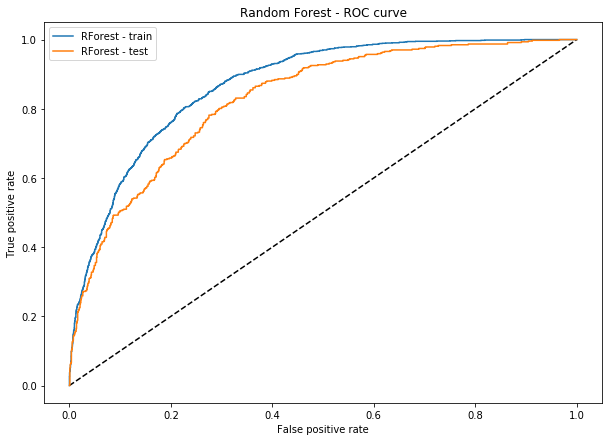

In [64]:
rf_fpr_train, rf_tpr_train, _ = roc_curve(y, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr_train, rf_tpr_train, label='RForest - train')
plt.plot(rf_fpr, rf_tpr, label='RForest - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest - ROC curve')
plt.legend(loc='best')
plt.show()

In [96]:
with open('./rf_model.pkl', 'wb') as f:
    pkl.dump(rf, f)

### Gradient Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

- Same for the tree specific hyperparameters
- **n_estimators, max_features**
- **learning_rate:** shrinking rate of each tree's contribution. You can do a trade-off between this and # of estimators
- **subsample:** percentage of records to use for each estimator's train phase; this is chosen by random subsampling

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1234, n_estimators=50)

In [67]:

# This is a useful function to print the results

def print_cv(cv):
  print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv.cv_results_['params'], cv.cv_results_['mean_train_score'], cv.cv_results_['mean_test_score'])]))

In [68]:
params = {'learning_rate': np.logspace(-1, -4, 4)}
cv_tuning = GridSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate': 0.1}, 0.8792535106206678, 0.8514706649843197)
({'learning_rate': 0.01}, 0.849383387866579, 0.8401525274753769)
({'learning_rate': 0.001}, 0.832172033980366, 0.8209954217120458)
({'learning_rate': 0.0001}, 0.8294508512694737, 0.8179224839940643)


In [69]:
gb = GradientBoostingClassifier(random_state=1234, n_estimators=50, learning_rate=0.01, max_depth=2)

params = {'min_samples_leaf': np.logspace(-1, -2, 4), 'max_features': ['sqrt', 0.2, 0.3, 0.5, 0.7, 0.8]}
cv_tuning = RandomizedSearchCV(gb, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)


({'min_samples_leaf': 0.01, 'max_features': 0.2}, 0.8463283939994339, 0.8422730916171163)
({'min_samples_leaf': 0.1, 'max_features': 0.7}, 0.8385855656562111, 0.8355127325612138)
({'min_samples_leaf': 0.021544346900318846, 'max_features': 'sqrt'}, 0.8462846647800262, 0.8424092052823582)
({'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.8463373965552765, 0.8424460776459252)
({'min_samples_leaf': 0.046415888336127795, 'max_features': 'sqrt'}, 0.8455894694404401, 0.841735385964614)
({'min_samples_leaf': 0.021544346900318846, 'max_features': 0.7}, 0.8389003741449053, 0.8354228611158494)
({'min_samples_leaf': 0.046415888336127795, 'max_features': 0.2}, 0.8460214786876762, 0.8420106346536069)
({'min_samples_leaf': 0.1, 'max_features': 0.2}, 0.8468058796903117, 0.8432335104636952)
({'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8456571553353911, 0.8419853265261436)
({'min_samples_leaf': 0.1, 'max_features': 0.3}, 0.8466291164913524, 0.842160881786659)
({'min_samples_leaf': 0.046415

In [70]:
params = {'min_samples_leaf': [0.1, 0.01], 'max_features': ['sqrt', 0.2, 0.3, 0.4], 'subsample': [0.4, 0.8, 1]}
cv_tuning = RandomizedSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5, random_state=1234, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'subsample': 0.8, 'min_samples_leaf': 0.1, 'max_features': 0.2}, 0.845452446847433, 0.8409849221051419)
({'subsample': 0.8, 'min_samples_leaf': 0.01, 'max_features': 0.3}, 0.8461994659766378, 0.8433710390875019)
({'subsample': 1, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8456571553353911, 0.8419853265261436)
({'subsample': 0.4, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.8456123160375759, 0.8408903769751506)
({'subsample': 0.8, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8442828960021405, 0.8406966873459187)
({'subsample': 0.4, 'min_samples_leaf': 0.1, 'max_features': 0.4}, 0.8423165888742533, 0.8401380596904993)
({'subsample': 1, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.8463373965552765, 0.8424460776459252)
({'subsample': 0.8, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.8451466390530691, 0.8403406728862844)
({'subsample': 0.4, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.839245353977509, 0.8376429995133433)
({'subsample': 1, 'mi

In [74]:
gb = GradientBoostingClassifier(random_state=1234, max_depth=2, subsample=0.8, min_samples_leaf=0.01, max_features=0.3)

params = [{'learning_rate': [0.01], 'n_estimators': [50, 100, 150]}, {'learning_rate': [0.01], 'n_estimators': [100, 200, 250]}]
cv_tuning = GridSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate': 0.01, 'n_estimators': 50}, 0.8461994659766378, 0.8433710390875019)
({'learning_rate': 0.01, 'n_estimators': 100}, 0.8492101104666581, 0.8456067646678229)
({'learning_rate': 0.01, 'n_estimators': 150}, 0.8515648243630561, 0.8472920655239096)
({'learning_rate': 0.01, 'n_estimators': 100}, 0.8492101104666581, 0.8456067646678229)
({'learning_rate': 0.01, 'n_estimators': 200}, 0.8533873049334281, 0.8483188968775263)
({'learning_rate': 0.01, 'n_estimators': 250}, 0.8554162576651961, 0.849619286045269)


In [76]:
gb = GradientBoostingClassifier(random_state=1234, max_depth=2, subsample=0.8, min_samples_leaf=0.01, max_features=0.3, learning_rate=0.01, n_estimators=150)

gb.fit(X, y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.01, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [77]:
gb_probs = [y for (x, y) in gb.predict_proba(X)]
gb_probs_test = [y for (x, y) in gb.predict_proba(X_test)]

print(roc_auc_score(y, gb_probs))
print(roc_auc_score(y_test, gb_probs_test))

0.8511516163450088
0.8203913769682053


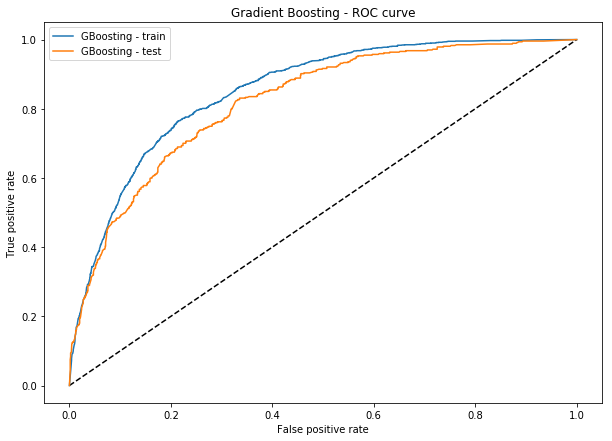

In [78]:
gb_fpr_train, gb_tpr_train, _ = roc_curve(y, gb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(gb_fpr_train, gb_tpr_train, label='GBoosting - train')
plt.plot(gb_fpr, gb_tpr, label='GBoosting - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting - ROC curve')
plt.legend(loc='best')
plt.show()

In [94]:
with open('./gb_model.pkl', 'wb') as f:
  pkl.dump(gb, f)

### Neural Network
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- **activation:** activation function for the layers. Choose between 'identity', ‘logistic’, ‘tanh’ and ‘relu’
- **learning_rate_init:** initial shrinking parameter of the learning. It is updated during the training
- **hidden_layer_sizes:** architecture of the hidden layers, as Python tuple: for example, for only one layer with 10 neurons, put (10,)
- **batch_size:** number of records taken for every minibatch iteration. Usually powers of 2 are good candidates (16, 32, 64, 128).
- **alpha:** L2 regularization parameter
- **max_iter:** maximum number of epochs

In [79]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=1234, max_iter=50)

In [80]:
import warnings

warnings.filterwarnings('ignore')

In [81]:
params = {'activation': ['tanh', 'relu',"logistic"], 'learning_rate_init': np.logspace(-1, -4, 4), 
          'batch_size': [16, 32, 64, 128]}
cv_tuning = RandomizedSearchCV(nn, params, random_state=1234, scoring='roc_auc', 
                               return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate_init': 0.1, 'batch_size': 64, 'activation': 'tanh'}, 0.4770392431747538, 0.4873308597809246)
({'learning_rate_init': 0.001, 'batch_size': 128, 'activation': 'logistic'}, 0.8494688304053636, 0.8465610759970864)
({'learning_rate_init': 0.001, 'batch_size': 128, 'activation': 'tanh'}, 0.8358370005154683, 0.8290425227558303)
({'learning_rate_init': 0.01, 'batch_size': 64, 'activation': 'logistic'}, 0.770156021266257, 0.7633491854735419)
({'learning_rate_init': 0.01, 'batch_size': 128, 'activation': 'relu'}, 0.8088915762219825, 0.800300340629116)
({'learning_rate_init': 0.0001, 'batch_size': 64, 'activation': 'logistic'}, 0.8430653261556518, 0.8423429870594437)
({'learning_rate_init': 0.1, 'batch_size': 32, 'activation': 'tanh'}, 0.4290683040054854, 0.4262711154473683)
({'learning_rate_init': 0.0001, 'batch_size': 128, 'activation': 'relu'}, 0.8392152164720615, 0.8409142284539184)
({'learning_rate_init': 0.01, 'batch_size': 128, 'activation': 'tanh'}, 0.7322444805554713, 0.

In [82]:
nn = MLPClassifier(random_state=1234, activation='logistic', max_iter=50, learning_rate_init=0.001)
params = {'batch_size': [64,128,256], 'hidden_layer_sizes': np.arange(20, 101, 20)}
cv_tuning = RandomizedSearchCV(nn, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=10)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'hidden_layer_sizes': 80, 'batch_size': 256}, 0.851439310148154, 0.8458153079848265)
({'hidden_layer_sizes': 40, 'batch_size': 256}, 0.8475356170200096, 0.8439654446577228)
({'hidden_layer_sizes': 20, 'batch_size': 64}, 0.8405749257963093, 0.8344883181394708)
({'hidden_layer_sizes': 60, 'batch_size': 256}, 0.8453223774692946, 0.8412324566083874)
({'hidden_layer_sizes': 100, 'batch_size': 256}, 0.8491707536314191, 0.8452012640474095)
({'hidden_layer_sizes': 60, 'batch_size': 64}, 0.8432837772329334, 0.8362286234734164)
({'hidden_layer_sizes': 20, 'batch_size': 256}, 0.8497370750572802, 0.8462388593859917)
({'hidden_layer_sizes': 60, 'batch_size': 128}, 0.847535696167346, 0.8394297915179849)
({'hidden_layer_sizes': 40, 'batch_size': 64}, 0.8480384317877332, 0.8416115010200236)
({'hidden_layer_sizes': 100, 'batch_size': 128}, 0.8494688304053636, 0.8465610759970864)


In [83]:
params = {'batch_size': [128,256], 'hidden_layer_sizes': [20, 40, 80]}
cv_tuning = GridSearchCV(nn, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'batch_size': 128, 'hidden_layer_sizes': 20}, 0.8490613187681371, 0.8429074786424853)
({'batch_size': 128, 'hidden_layer_sizes': 40}, 0.8504740309441233, 0.8450525631351423)
({'batch_size': 128, 'hidden_layer_sizes': 80}, 0.8470137468041548, 0.8425854385102183)
({'batch_size': 256, 'hidden_layer_sizes': 20}, 0.8497370750572802, 0.8462388593859917)
({'batch_size': 256, 'hidden_layer_sizes': 40}, 0.8475356170200096, 0.8439654446577228)
({'batch_size': 256, 'hidden_layer_sizes': 80}, 0.851439310148154, 0.8458153079848265)


In [84]:
nn = MLPClassifier(random_state=1234, activation='logistic', max_iter=500, 
                   learning_rate_init=0.001, batch_size=256, hidden_layer_sizes=(20,), 
                   verbose=True, n_iter_no_change=100, tol=1e-5)

nn.fit(X, y)

Iteration 1, loss = 0.56279645
Iteration 2, loss = 0.54150357
Iteration 3, loss = 0.53097977
Iteration 4, loss = 0.51517192
Iteration 5, loss = 0.49558971
Iteration 6, loss = 0.47827496
Iteration 7, loss = 0.47583179
Iteration 8, loss = 0.46551068
Iteration 9, loss = 0.46171618
Iteration 10, loss = 0.45215767
Iteration 11, loss = 0.44993564
Iteration 12, loss = 0.45216989
Iteration 13, loss = 0.44567976
Iteration 14, loss = 0.44061837
Iteration 15, loss = 0.43817818
Iteration 16, loss = 0.44239662
Iteration 17, loss = 0.43800504
Iteration 18, loss = 0.43610487
Iteration 19, loss = 0.43543512
Iteration 20, loss = 0.43673163
Iteration 21, loss = 0.43218147
Iteration 22, loss = 0.43216229
Iteration 23, loss = 0.42565065
Iteration 24, loss = 0.42355483
Iteration 25, loss = 0.42993877
Iteration 26, loss = 0.42580003
Iteration 27, loss = 0.42668013
Iteration 28, loss = 0.42757409
Iteration 29, loss = 0.42441784
Iteration 30, loss = 0.41631282
Iteration 31, loss = 0.42251995
Iteration 32, los

Iteration 258, loss = 0.40066653
Iteration 259, loss = 0.39951022
Iteration 260, loss = 0.39896898
Iteration 261, loss = 0.40135829
Iteration 262, loss = 0.40183172
Iteration 263, loss = 0.40559480
Iteration 264, loss = 0.40503160
Iteration 265, loss = 0.40121172
Iteration 266, loss = 0.40088508
Iteration 267, loss = 0.40387253
Iteration 268, loss = 0.40009727
Iteration 269, loss = 0.39834138
Iteration 270, loss = 0.39909070
Iteration 271, loss = 0.40345249
Iteration 272, loss = 0.40466531
Iteration 273, loss = 0.40033607
Iteration 274, loss = 0.40456679
Iteration 275, loss = 0.40037216
Iteration 276, loss = 0.39935792
Iteration 277, loss = 0.39900063
Iteration 278, loss = 0.39916138
Iteration 279, loss = 0.39703713
Iteration 280, loss = 0.40053675
Iteration 281, loss = 0.39866832
Iteration 282, loss = 0.39820980
Iteration 283, loss = 0.39977004
Iteration 284, loss = 0.39956296
Iteration 285, loss = 0.40699212
Iteration 286, loss = 0.40452528
Iteration 287, loss = 0.40636816
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [85]:
nn_probs = [y for (x, y) in nn.predict_proba(X)]
nn_probs_test = [y for (x, y) in nn.predict_proba(X_test)]

print(roc_auc_score(y, nn_probs))
print(roc_auc_score(y_test, nn_probs_test))

0.8553066899706441
0.8239243187476468


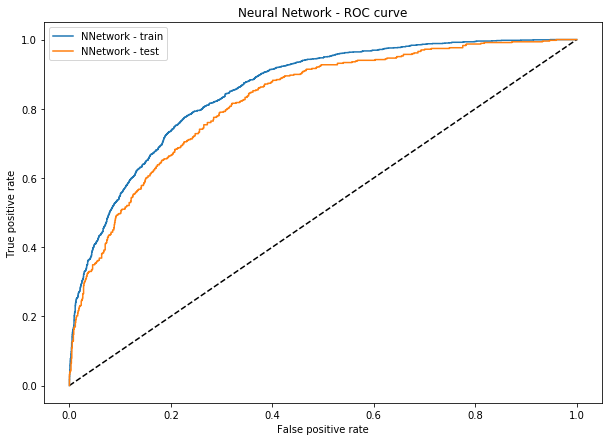

In [86]:
nn_fpr_train, nn_tpr_train, _ = roc_curve(y, nn_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(nn_fpr_train, nn_tpr_train, label='NNetwork - train')
plt.plot(nn_fpr, nn_tpr, label='NNetwork - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Network - ROC curve')
plt.legend(loc='best')
plt.show()

In [93]:
with open('./nn_model.pkl', 'wb') as f:
    pkl.dump(nn, f)
    # save the model in the file

# Neural Network with Keras

In [ ]:
#import pandas as pd
#from datetime import datetime
#import numpy as np
#import logging
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.layers import advanced_activations
#from keras.optimizers import Adam
#import keras
#from tensorflow.examples.tutorials.mnist import input_data
#from matplotlib import pyplot as plt
#
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#logger = logging.getLogger('')
#
## Parameters
#learning_rate = 0.001
#num_steps = 15
#batch_size = 256
#
## Network Parameters
#n_hidden_1 = 256 # 1st layer number of neurons
#num_input = tlc_db1.shape[0] 
#num_classes = tlc_db1.shape[1] 
#
#metrics = ['accuracy','mae']
#
#def modelDefinition(self):
#    self.model = Sequential()
#    self.model.add(Dense(num_input, input_dim=num_input,activation='logistic'))
#    self.model.add(Dense(n_hidden_1,activation=self.activationFun))
#    self.model.add(Dense(num_classes,activation='logistic'))
#    
#def modelCompile(self):
#    adam = Adam(lr=learning_rate)
#    self.model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=metrics)
#        
#def modelEval(self):
#    tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph',write_graph=True, write_images=True,embeddings_freq=0)
#    history = self.model.fit(X, y, epochs=num_steps, batch_size=batch_size,validation_data=(X_test,Y_test),callbacks=[tbCallBack])#validation_split=0.05
#    scores = self.model.evaluate(X_test,Y_test)
#    return history,scores,self.model
#    
#class PlotGraphs:
#    def __init__(self,**kargs):
#        history= kargs['h']
#        self.history_dict = history.history
#        self.metList = []
#        for cur_key in history.history.keys():
#            if cur_key.find('val')!=0:
#                self.metList.append(cur_key)
#        print(self.metList)
#        self.lenList = len(self.metList)
#    
#    def plotResults(self):
#        plotPos = 1
#        for cur_met in self.metList:
#            cur_values = self.history_dict[cur_met]
#            cur_val = self.history_dict['val_%s'%cur_met]
#            epochs = range(1, len(cur_values) + 1)
#            plt.subplot(self.lenList, 1, plotPos)
#            plt.plot(epochs, cur_values, 'ro')
#            plt.plot(epochs, cur_val, 'b+')
#            plt.xlabel('Epochs')
#            plt.ylabel(cur_met)
#            plotPos += 1
#
#
#def main():
#    start_time = datetime.now()
#    logger.info('START')
#
#    modelDefinition()#useDropout=True
#    modelCompile()
#    history, scores, model = modelEval()
#    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#    logger.info('INITIALIZATION OF PLOTGRAPH')
#    pg = PlotGraphs(h=history)
#    pg.plotResults()
#    logger.info("EXECUTED IN %f SEC"%((datetime.now()-start_time)).total_seconds())
#    logger.info('END')
#    return history

In [ ]:
tlc_db.shape[1]

# Support vector machines

In [87]:
from sklearn import svm
classifier = svm.SVC(probability=True, gamma = 0.1)
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
results = classifier.predict(X_test)

In [89]:
accuracy_score(results,y_test)

0.7599544937428896

In [90]:
svm_probs = [y for (x, y) in classifier.predict_proba(X)]
svm_probs_test = [y for (x, y) in classifier.predict_proba(X_test)]

print(roc_auc_score(y, svm_probs))
print(roc_auc_score(y_test, svm_probs_test))

0.9877291222103017
0.6654428534227239


**Why overfit??**

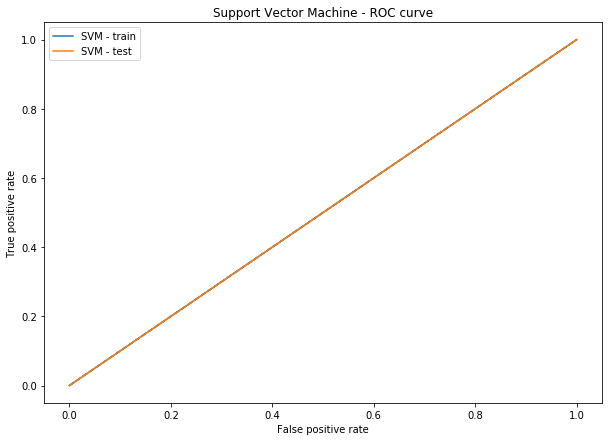

In [77]:
svm_fpr_train, svm_tpr_train, _ = roc_curve(y, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(svm_fpr_train, svm_tpr_train, label='SVM - train')
plt.plot(svm_fpr, svm_tpr, label='SVM - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine - ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in tlc_db1.columns if i not in Id_col + target_col]
telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = False)

# Evaluation of all the models

In [100]:
with open('./lr_model.pkl', 'rb') as f:
    lr = pkl.load(f)

with open('./dectree.pkl', 'rb') as f:
    dt = pkl.load(f)

with open('./rf_model.pkl', 'rb') as f:
    rf = pkl.load(f)

with open('./gb_model.pkl', 'rb') as f:
    gb = pkl.load(f)

with open('./nn_model.pkl', 'rb') as f:
    nn = pkl.load(f)

# Model Comparison

In [101]:
lr_preds = lr.predict(X_test.drop(drop_c, 1))
lr_probs_train = [y for (x, y) in lr.predict_proba(X.drop(drop_c, 1))]
lr_probs = [y for (x, y) in lr.predict_proba(X_test.drop(drop_c, 1))]
lr_auc_train = roc_auc_score(y, lr_probs_train)
lr_auc = roc_auc_score(y_test, lr_probs)

dt_preds = dectree.predict(X_test)
dt_probs_train = [y for (x, y) in dectree.predict_proba(X)]
dt_probs = [y for (x, y) in dectree.predict_proba(X_test)]
dt_auc_train = roc_auc_score(y, dt_probs_train)
dt_auc = roc_auc_score(y_test, dt_probs)

rf_preds = rf.predict(X_test)
rf_probs_train = [y for (x, y) in rf.predict_proba(X)]
rf_probs = [y for (x, y) in rf.predict_proba(X_test)]
rf_auc_train = roc_auc_score(y, rf_probs_train)
rf_auc = roc_auc_score(y_test, rf_probs)

gb_preds = gb.predict(X_test)
gb_probs_train = [y for (x, y) in gb.predict_proba(X)]
gb_probs = [y for (x, y) in gb.predict_proba(X_test)]
gb_auc_train = roc_auc_score(y, gb_probs_train)
gb_auc = roc_auc_score(y_test, gb_probs)

nn_preds = nn.predict(X_test)
nn_probs_train = [y for (x, y) in nn.predict_proba(X)]
nn_probs = [y for (x, y) in nn.predict_proba(X_test)]
nn_auc_train = roc_auc_score(y, nn_probs_train)
nn_auc = roc_auc_score(y_test, nn_probs)


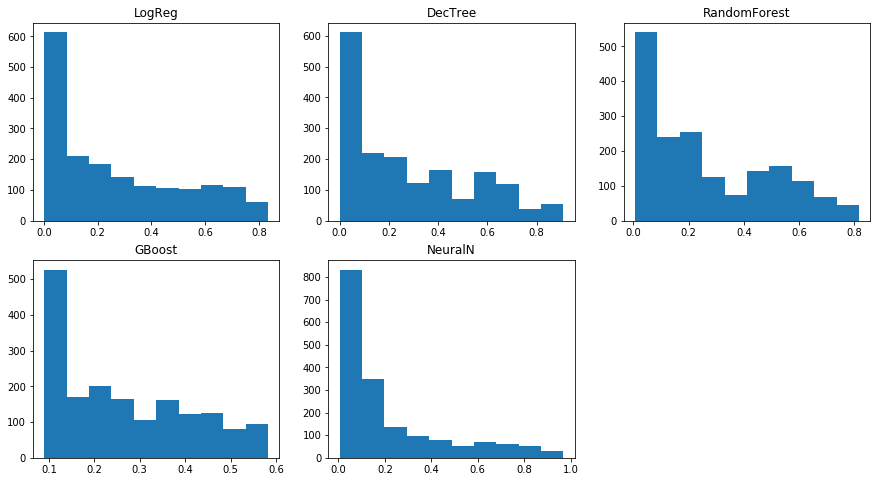

In [102]:
plt.figure(figsize=(15, 8))
i = 230

for model_name, probs in zip(['LogReg', 'DecTree', 'RandomForest', 'GBoost', 'NeuralN'],
                             [lr_probs, dt_probs, rf_probs, gb_probs, nn_probs]):
    i += 1
    plt.subplot(i)
    plt.hist(probs)
    plt.title(model_name)
    
plt.show()

In [107]:
import numpy as np
print('Churn rate predicted by Random Forest classifier on test set:',np.mean(rf_probs))
print('Churn rate predicted by Decision Tree classifier on test set:',np.mean(dectree_probs))
print('Churn rate predicted by Logistic Regression classifier on test set:',np.mean(lr_probs))
print('Churn rate predicted by Neural Network on test set:',np.mean(nn_probs))
print('Churn rate predicted by Gradient Boosting classifier on test set:',np.mean(gb_probs))

Churn rate predicted by Random Forest classifier on test set: 0.2629805094428071
Churn rate predicted by Decision Tree classifier on test set: 0.2658323852863102
Churn rate predicted by Logistic Regression classifier on test set: 0.26563228475629874
Churn rate predicted by Neural Network on test set: 0.2119155214699966
Churn rate predicted by Gradient Boosting classifier on test set: 0.264335500573142


# Comparison of Roc-Auc Score

In [113]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

In [114]:
pd.DataFrame({'train_ROC': [lr_auc_train, dt_auc_train, rf_auc_train, gb_auc_train, nn_auc_train],
              'test_ROC': [lr_auc, dt_auc, rf_auc, gb_auc, nn_auc]},
             index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network'])

,train_ROC,test_ROC
Logistic Regression,0.855722,0.821657
Decision Tree,0.864897,0.814131
Random Forest,0.869843,0.827410
Gradient Boosting,0.851152,0.820391
Neural Network,0.855307,0.823924


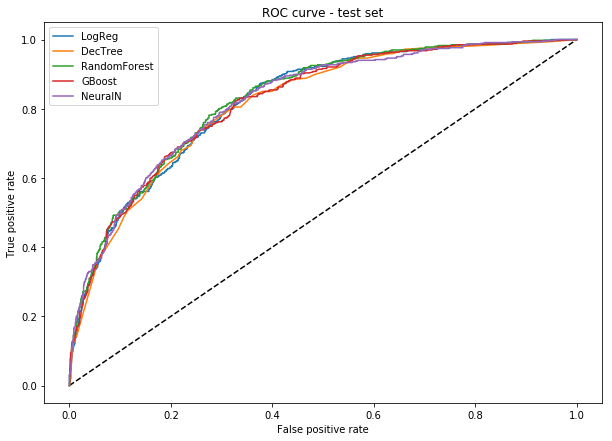

In [115]:
plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr, lr_tpr, label='LogReg')
plt.plot(dt_fpr, dt_tpr, label='DecTree')
plt.plot(rf_fpr, rf_tpr, label='RandomForest')
plt.plot(gb_fpr, gb_tpr, label='GBoost')
plt.plot(nn_fpr, nn_tpr, label='NeuralN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - test set')
plt.legend(loc='best')
plt.show()

## Accuracy

In [126]:
print('Accuracy by Random Forest classifier on test set:',accuracy_score(y_test,rf_preds))
print('Accuracy by Decision Tree classifier on test set:',accuracy_score(y_test,dt_preds))
print('Accuracy by Logistic Regression classifier on test set:',accuracy_score(y_test,lr_preds))
print('Accuracy by Neural Network on test set:',accuracy_score(y_test,nn_preds))
print('Accuracy by Gradient Boosting classifier on test set:',accuracy_score(y_test,gb_preds))

Accuracy by Random Forest classifier on test set: 0.7923777019340159
Accuracy by Decision Tree classifier on test set: 0.7844141069397043
Accuracy by Logistic Regression classifier on test set: 0.7906712172923777
Accuracy by Neural Network on test set: 0.78839590443686
Accuracy by Gradient Boosting classifier on test set: 0.7792946530147895


## Precision, Recall and F1 Score

In [133]:
pd.DataFrame({'Precision': [precision_score(y_test,lr_preds),precision_score(y_test,dt_preds),precision_score(y_test,rf_preds),precision_score(y_test,gb_preds), precision_score(y_test,nn_preds)],
              'Recall': [recall_score(y_test,lr_preds),recall_score(y_test,dt_preds),recall_score(y_test,rf_preds),recall_score(y_test,gb_preds),recall_score(y_test,nn_preds)],
             'F1 Score':[f1_score(y_test,lr_preds),f1_score(y_test,dt_preds),f1_score(y_test,rf_preds),f1_score(y_test,gb_preds),f1_score(y_test,nn_preds)]},
             index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network'])

,Precision,Recall,F1 Score
Logistic Regression,0.627249,0.522484,0.570093
Decision Tree,0.614583,0.505353,0.554642
Random Forest,0.637097,0.507495,0.564958
Gradient Boosting,0.748428,0.254818,0.380192
Neural Network,0.681992,0.381156,0.489011
